In [1]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
sns.set()

In [2]:
raw_data = pd.read_csv('real_life_example.csv')
raw_data.head()
# predict the price
# brand, mileage, engine volume, year

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [3]:
raw_data.describe(include='all') 
# there are some missing vals
# 312 unique models? this means 312 dummy vals
# almost all of the registration is yes 

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [4]:
data = raw_data.drop(['Model'], axis=1)
data.isnull().sum() # check missing vals

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [5]:
# rule of thumb -> if u remove <5% u are good to go
data_no_mv = data.dropna(axis=0)
data_no_mv.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

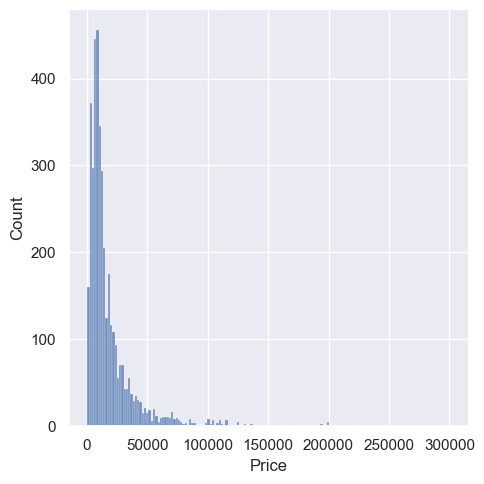

In [6]:
# pdf prob dist func for each feature
sns.displot(data_no_mv['Price']) # we r looking for normal distribution
# outliers
# remove top 1% of distributions

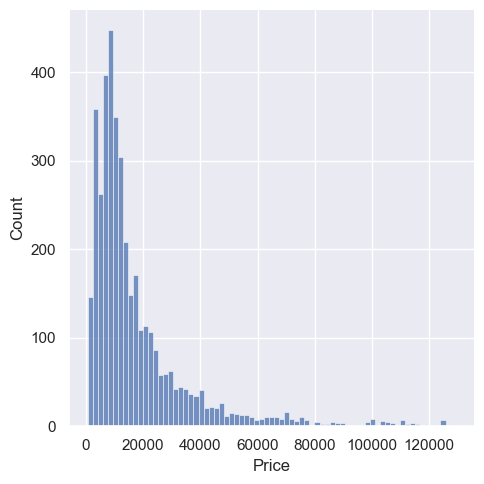

In [7]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
sns.displot(data_1['Price'])

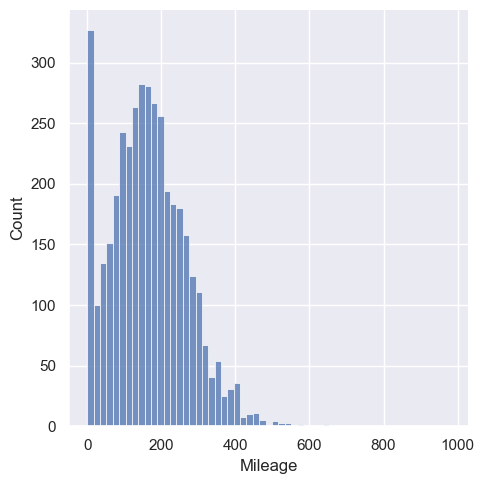

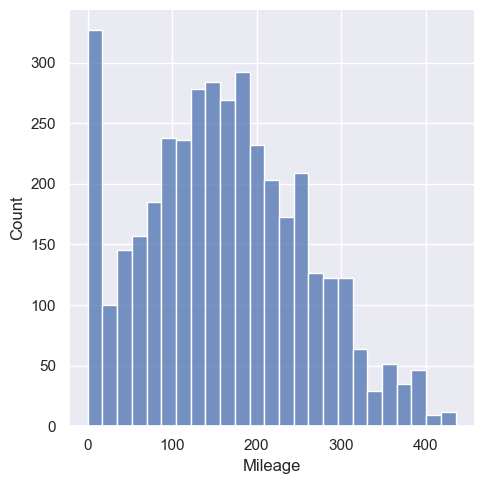

In [8]:
sns.displot(data_1['Mileage']) # same problem
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]
sns.displot(data_2['Mileage'])

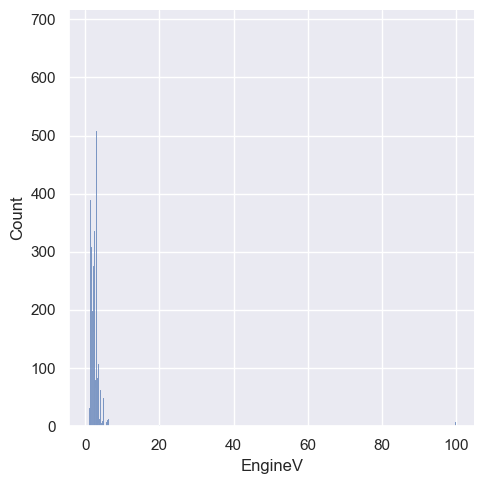

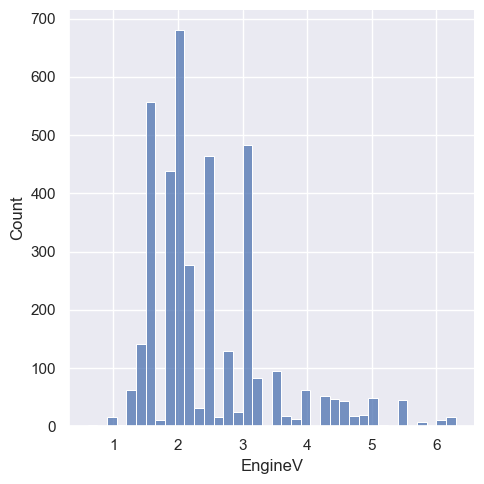

In [9]:
sns.displot(data_2['EngineV']) # similar problem
data_3 = data_2[data_2['EngineV']<6.5]
sns.displot(data_3['EngineV'])

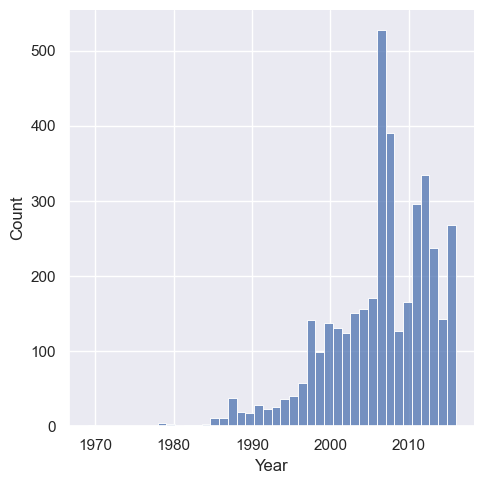

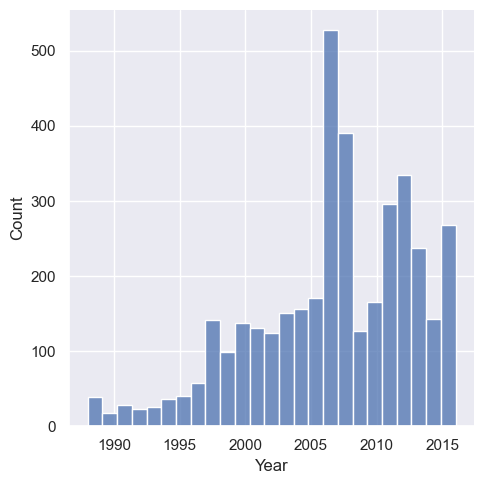

In [10]:
sns.displot(data_3['Year'])
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]
sns.displot(data_4['Year'])

In [11]:
data_cleaned = data_4.reset_index(drop=True)
data_cleaned.describe() # we deleted around 250 observations

,Price,Mileage,EngineV,Year
count,3867.000000,3867.000000,3867.000000,3867.000000
mean,18194.455679,160.542539,2.450440,2006.709853
std,19085.855165,95.633291,0.949366,6.103870
min,800.000000,0.000000,0.600000,1988.000000
25%,7200.000000,91.000000,1.800000,2003.000000
50%,11700.000000,157.000000,2.200000,2008.000000
75%,21700.000000,225.000000,3.000000,2012.000000
max,129222.000000,435.000000,6.300000,2016.000000


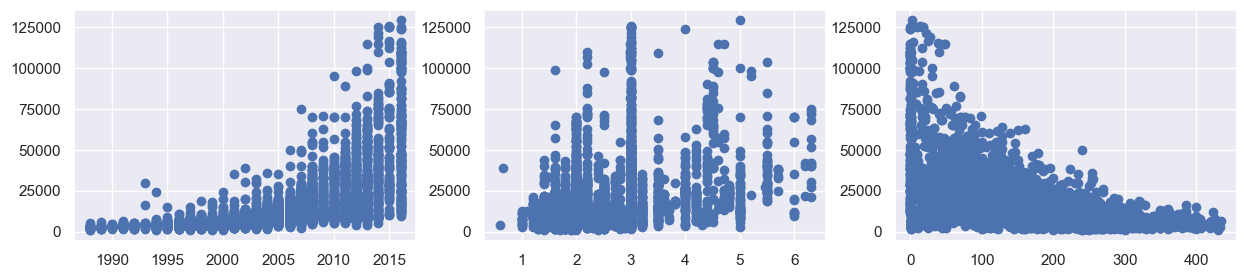

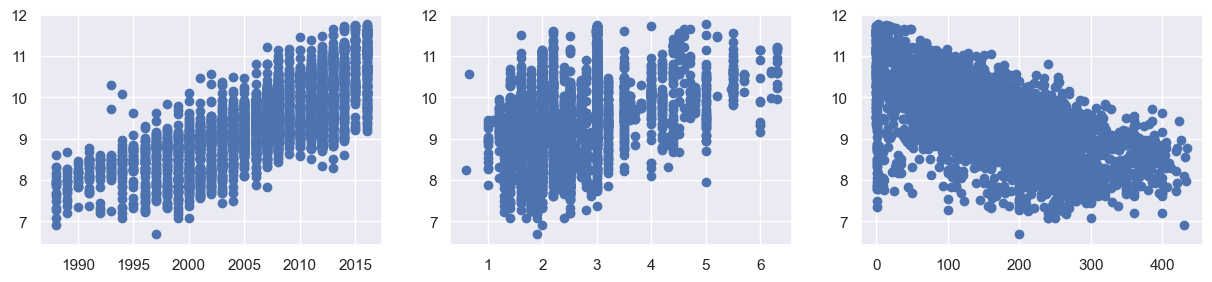

In [12]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
plt.show()
# log transforms are useful when facing exponential relationships
log_price = np.log(data_cleaned['Price'])
data_cleaned['LogPrice'] = log_price
f, (ax4, ax5, ax6) = plt.subplots(1, 3, figsize=(15,3))
ax4.scatter(data_cleaned['Year'], data_cleaned['LogPrice'])
ax5.scatter(data_cleaned['EngineV'], data_cleaned['LogPrice'])
ax6.scatter(data_cleaned['Mileage'], data_cleaned['LogPrice'])
plt.show()
data_cleaned = data_cleaned.drop(['Price'], axis=1)

In [13]:
# multicollinearity
data_cleaned.columns.values
# year and mileage?
# statsmodels vif (variance inflation factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage', 'Year', 'EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
# vif 1 = no multicollinearity , 1-5 okay , >5,6 not okay, >10 not acceptable
# remove year
data_no_multicollinearity = data_cleaned.drop(['Year'], axis=1)
vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [14]:
# dummy vars for categorical 
# n-1 dummies for n categorical
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first='Audi')
data_with_dummies.head()

,Mileage,EngineV,LogPrice,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,427,2.9,8.974618,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,358,5.0,9.495519,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,240,4.2,10.043249,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,120,2.0,9.814656,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


In [15]:
data_with_dummies.columns.values
cols = ['LogPrice', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']
data_rearranged = data_with_dummies[cols]
data_rearranged.head()

,LogPrice,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,8.974618,427,2.9,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,9.495519,358,5.0,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,10.043249,240,4.2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,9.814656,120,2.0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


<function matplotlib.pyplot.show(close=None, block=None)>

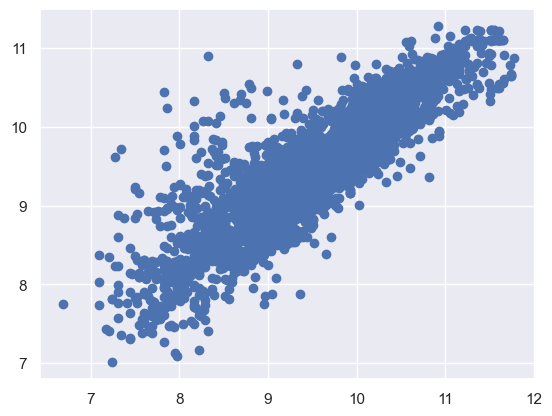

In [16]:
# target is log price
targets = data_rearranged['LogPrice']
inputs = data_rearranged.drop(['LogPrice'], axis=1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)
y_hat = reg.predict(x_train)

plt.scatter(y_train, y_hat)
plt.show

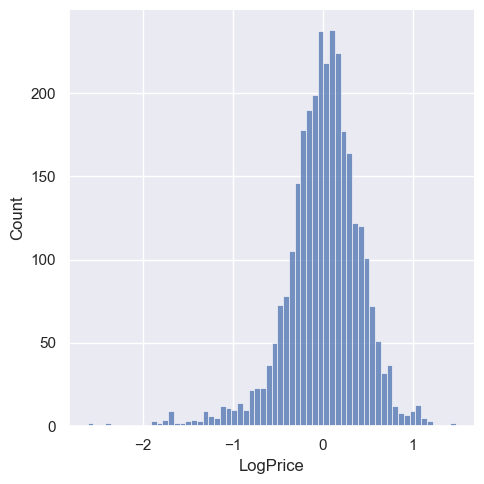

In [17]:
sns.displot(y_train - y_hat)
# residual plot - differences betw target and prediction
# we have overestimations (left side) but no under.

In [18]:
reg.score(x_train, y_train) # our model explains 75% of the variability of the data

0.7546487921881216

In [19]:
reg.intercept_

np.float64(9.421003614148074)

In [20]:
reg.coef_

array([-0.46815598,  0.21526817,  0.01105151,  0.00569157, -0.14247174,
       -0.18769337, -0.06529696, -0.09898873, -0.13980763, -0.09384461,
       -0.17892753, -0.11457574, -0.15668036, -0.11685263, -0.02572253,
       -0.15106183,  0.31442123])

In [21]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary
# audi is benchmark
# bmw is more expensive than audi

,Features,Weights
0,Mileage,-0.468156
1,EngineV,0.215268
2,Brand_BMW,0.011052
3,Brand_Mercedes-Benz,0.005692
4,Brand_Mitsubishi,-0.142472
5,Brand_Renault,-0.187693
6,Brand_Toyota,-0.065297
7,Brand_Volkswagen,-0.098989
8,Body_hatch,-0.139808
9,Body_other,-0.093845


In [22]:
data_cleaned['Body'].unique(), data_cleaned['Engine Type'].unique(), data_cleaned['Registration'].unique()

(array(['sedan', 'van', 'crossover', 'vagon', 'other', 'hatch'],
       dtype=object),
 array(['Petrol', 'Diesel', 'Gas', 'Other'], dtype=object),
 array(['yes', 'no'], dtype=object))

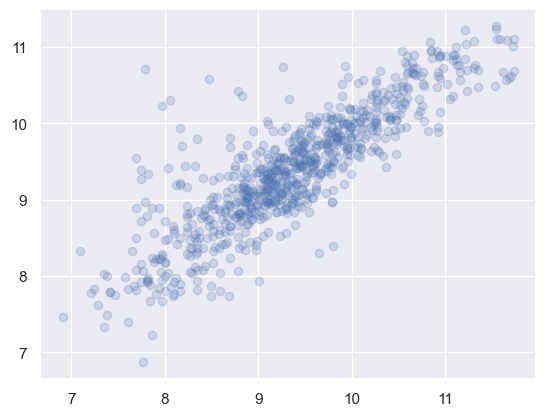

,Prediction
0,40419.308971
1,7956.895960
2,5757.284408
3,9765.810605
4,7027.363814


In [23]:
# test
y_hat_test = reg.predict(x_test)
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.show()

# performance
df_pf = pd.DataFrame(y_hat_test, columns=['Prediction'])
# we have log prices -> take exponential
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

In [24]:
df_pf['Target'] = np.exp(y_test) # lots of missing values
# pandas tried to match indices
y_test = y_test.reset_index(drop=True)
df_pf['Target'] = np.exp(y_test)
df_pf.head()

,Prediction,Target
0,40419.308971,21300.0
1,7956.895960,8900.0
2,5757.284408,3250.0
3,9765.810605,12000.0
4,7027.363814,5400.0


In [25]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']
df_pf['Difference%'] = np.absolute(df_pf['Residual'] / df_pf['Target'] * 100)
df_pf.head()

,Prediction,Target,Residual,Difference%
0,40419.308971,21300.0,-19119.308971,89.762014
1,7956.895960,8900.0,943.104040,10.596675
2,5757.284408,3250.0,-2507.284408,77.147213
3,9765.810605,12000.0,2234.189395,18.618245
4,7027.363814,5400.0,-1627.363814,30.136367


In [26]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,16113.011638,17799.988992,1686.977355,42.085282
std,13326.229797,19723.434542,11192.614496,96.169928
min,967.030415,999.000000,-42859.020603,0.020246
25%,7467.591694,6700.000000,-2246.354353,11.024941
50%,11914.358989,11050.000000,-38.697776,24.086183
75%,20249.505640,20475.000000,3004.524837,42.381716
max,79026.348020,125000.000000,81051.158885,1785.792525


In [27]:
df_pf.sort_values(by=['Difference%']).head()

,Prediction,Target,Residual,Difference%
387,13602.753468,13600.0,-2.753468,0.020246
74,28889.063628,28900.0,10.936372,0.037842
314,35530.207664,35500.0,-30.207664,0.085092
336,11313.265936,11300.0,-13.265936,0.117398
425,2995.676139,3000.0,4.323861,0.144129


In [28]:
df_pf.sort_values(by=['Difference%']).tail()

,Prediction,Target,Residual,Difference%
713,13941.933769,2200.0,-11741.933769,533.724262
280,39469.510133,4800.0,-34669.510133,722.281461
219,27632.396163,2900.0,-24732.396163,852.841247
750,30076.594470,3150.0,-26926.594470,854.812523
681,45259.020603,2400.0,-42859.020603,1785.792525
